In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download books.csv

404 - Not Found


In [ ]:
! unzip books.csv.zip

Archive:  books.csv.zip
  inflating: books.csv               


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative
#statistical graphics
import seaborn as sns

In [ ]:
#Loading the dataset

df = pd.read_csv('books1.csv',error_bad_lines = False)

# Lines with too many fields (e.g. a csv line with too many commas) will by default cause an exception to be raised,
# and no DataFrame will be returned. If False, then these “bad lines” will dropped from the DataFrame that is returned.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

#it will return the first 5 rows of the dataset

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         4 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

#to check if there are any null values in any column of the dataset

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
num_pages                 0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11123
dtype: int64

In [ ]:
df.describe()

#will give us statistical information about the dataset

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [ ]:
n1=df['num_pages'].sort_values(ascending=False).head(10)
n1

#noticing that data is noisy in num_pages column

8979      eng
4702      eng
5877      eng
3348    en-US
3131      999
7260      998
7532      997
5488      992
3137      992
7371      992
Name: num_pages, dtype: object

In [ ]:
df=df.sort_values('num_pages', ascending=False).reset_index()
df=df.iloc[4:] #extracted the rows that only have numerical data
df.head(20)

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
4,3131,11511,L'Échiquier du mal,Dan Simmons,3.9,2207254410,9.78221E+12,fre,999,63,7,06-08-2003,Denoël,NaN
5,7260,27847,Data Structures and Abstractions with Java,Frank M. Carrano/Walter J. Savitch,3.47,013237045X,9.78013E+12,eng,998,34,3,08-04-2006,Prentice Hall,NaN
6,7532,28898,Fundamentals of Heat and Mass Transfer [with I...,Frank P. Incropera/David P. DeWitt,3.99,470055545,9.78047E+12,en-US,997,6,0,10/30/2006,Wiley,NaN
7,5488,19809,The Last Lion: Winston Spencer Churchill: Visi...,William Manchester,4.42,385313489,9.78039E+12,eng,992,9659,467,04-01-1984,Delta,NaN
8,3137,11525,1 000 Places to See Before You Die,Patricia Schultz,3.85,761104844,9.78076E+12,eng,992,36303,439,5/22/2003,Workman Publishing Company,NaN
9,7371,28389,Marcel Proust: A Life,William C. Carter,4.33,300094000,9.7803E+12,eng,992,14,4,02-08-2002,Yale University Press,NaN
10,4621,16619,Democracy in America,Alexis de Tocqueville/Isaac Kramnick/Gerald Bevan,4.02,140447601,9.78014E+12,eng,992,18925,523,4/24/2003,Penguin Classics,NaN
11,5487,19808,The Last Lion: Winston Spencer Churchill: Visi...,William Manchester,4.42,316545031,9.78032E+12,en-US,992,335,38,5/30/1983,Little Brown & Company,NaN
12,5453,19670,Debt of Honor (Jack Ryan #7),Tom Clancy,4.05,425147584,9.78043E+12,eng,990,39521,469,08-01-1995,Berkley Books,NaN
13,10961,44921,Explode the Code 1,Nancy Hall,4.37,838814603,9.78084E+12,eng,99,89,10,01-01-2001,School Specialty Publishing,NaN


In [ ]:
df.average_rating=df.average_rating.astype(float)

print(df.average_rating.dtype)

#removed the rows that had text data for average_rating column and converted the datatype from object to float

float64


In [ ]:
df.num_pages=df.num_pages.astype(float)

print(df.num_pages.dtype)

#removed the rows that had text data for num_pages column and converted the datatype from object to float

float64


In [ ]:
df=df.drop(['Unnamed: 12'], axis=1) #removing unwanted column Unnamed from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 4 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               11123 non-null  int64  
 1   bookID              11123 non-null  int64  
 2   title               11123 non-null  object 
 3   authors             11123 non-null  object 
 4   average_rating      11123 non-null  float64
 5   isbn                11123 non-null  object 
 6   isbn13              11123 non-null  object 
 7   language_code       11123 non-null  object 
 8   num_pages           11123 non-null  float64
 9   ratings_count       11123 non-null  int64  
 10  text_reviews_count  11123 non-null  int64  
 11  publication_date    11123 non-null  object 
 12  publisher           11123 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1.1+ MB


[Text(0.5, 1.0, 'Top 10 books with highest rating')]

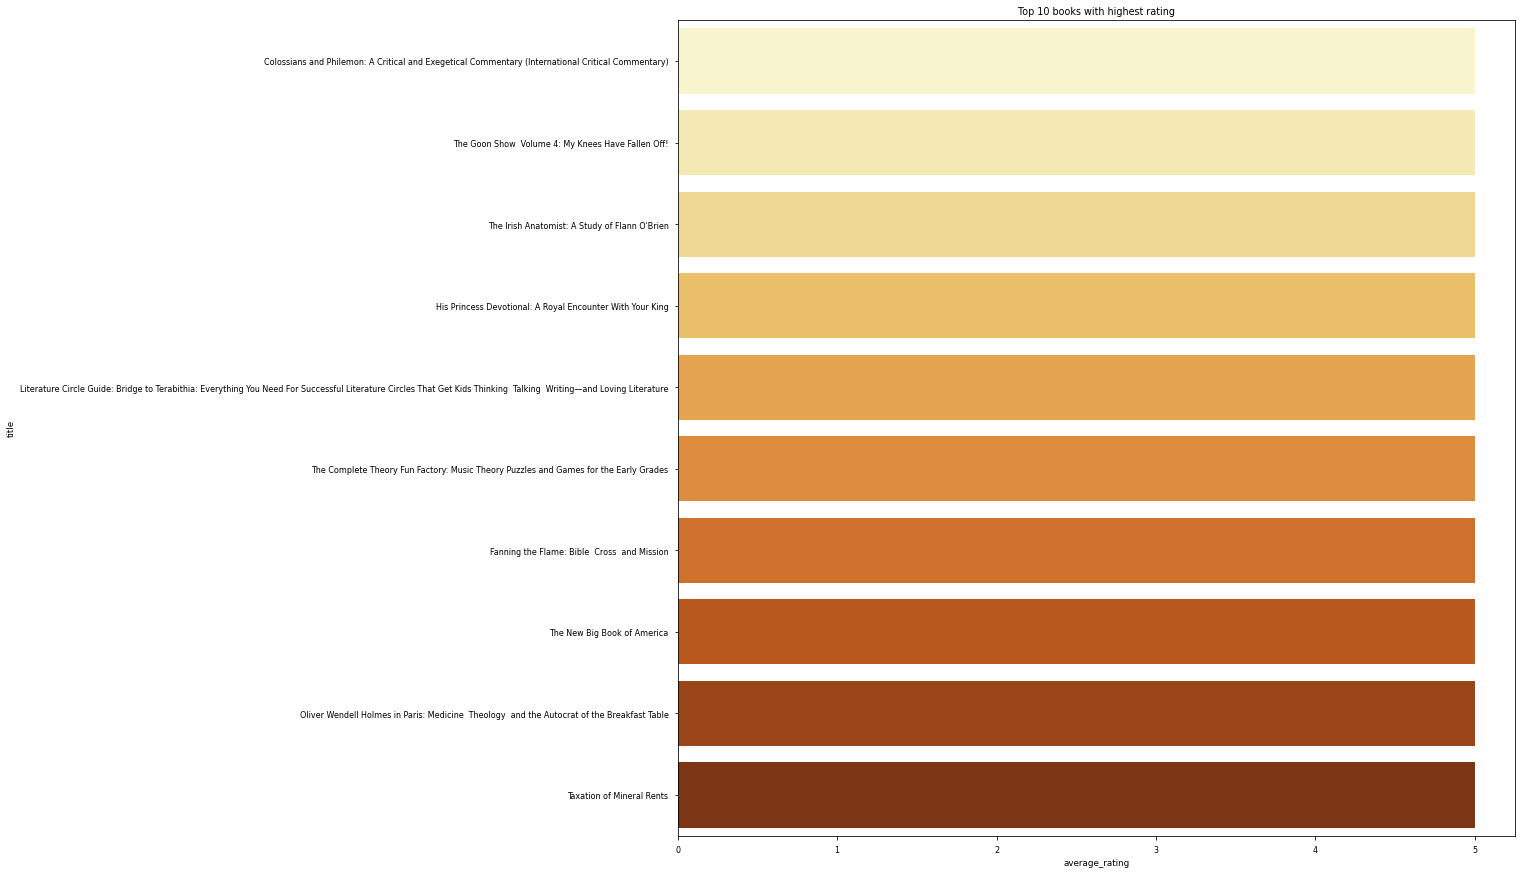

In [ ]:
 #getting the books that have the highest average rating given to them
 top_ten_highest_rating = df.sort_values(by='average_rating', ascending=False).head(10)
 plt.style.use('seaborn-paper')
 fig = plt.figure(figsize = (15, 15)) #for creating the graph and adjusting its size
#  sns.set(font_scale = 3) #for adjusting the font size of the axes label
 sns.barplot(x="average_rating", y="title", data=top_ten_highest_rating , palette='YlOrBr').set(title='Top 10 books with highest rating')



[Text(0.5, 1.0, 'Top 10 books with highest number of ratings')]

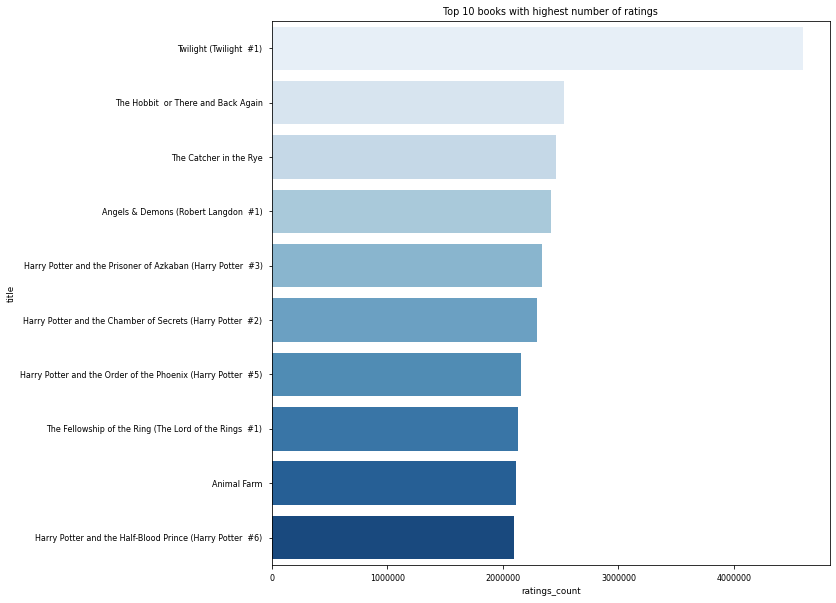

In [ ]:
#getting the books that have the highest number of ratings

top_ten_highest_num_rating = df.sort_values(by='ratings_count', ascending=False).head(10)
plt.style.use('seaborn-paper')
fig, ax = plt.subplots(figsize = (10, 10))
#  sns.set(font_scale = 3)
ax.ticklabel_format(style='plain')
sns.barplot(x="ratings_count", y="title", data=top_ten_highest_num_rating , palette='Blues').set(title='Top 10 books with highest number of ratings')




[Text(0.5, 1.0, 'Top 10 books in terms of average rating and number of ratings')]

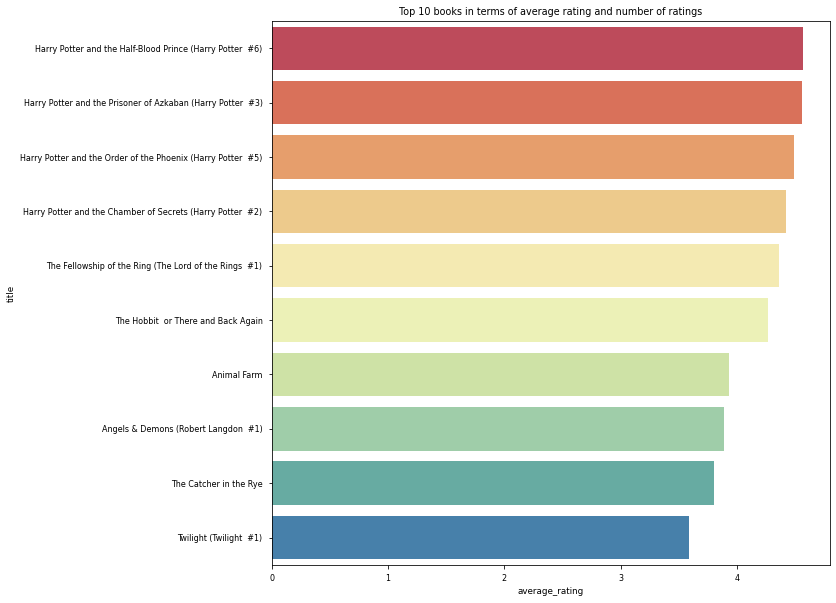

In [ ]:
#getting the books that have the highest average rating and number of ratings
top_ten=df[df['ratings_count']>1000000]
top_ten=top_ten.sort_values(by='ratings_count', ascending=False).head(10)
top_ten_rating=top_ten.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-paper')
plt.figure(figsize=(10,10))
#  sns.set(font_scale = 3)
sns.barplot(x="average_rating", y="title", data=top_ten_rating, palette='Spectral').set(title='Top 10 books in terms of average rating and number of ratings')

In [ ]:
# to know the top 10 authors who have written the most number of books
ba1= df.groupby('authors')
print(ba1.first())
# print(ba1.first()['title'])
print(ba1.first()['title'].count())

book_authors = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
book_authors
# print(type(book_authors))


                                                    index  bookID  \
authors                                                             
A.B. Yehoshua/Hillel Halkin                          7172   27503   
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky         4954   17883   
A.E. Cunningham/Harlan Ellison/Charles F. Mille...  10114   40880   
A.J. Jacobs                                          7303   28116   
A.M. Homes                                           7639   29412   
...                                                   ...     ...   
Émile Zola/Henri Mitterand                           7384   28417   
Émile Zola/Robert Lethbridge/Elinor Dorday           7386   28419   
Émile Zola/Robin Buss/Brian  Nelson                  7382   28413   
Émile Zola/Roger Pearson                             7378   28407   
Éric-Emmanuel Schmitt                                1246    4314   

                                                                                                title 

,title
authors,
Stephen King,40
P.G. Wodehouse,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


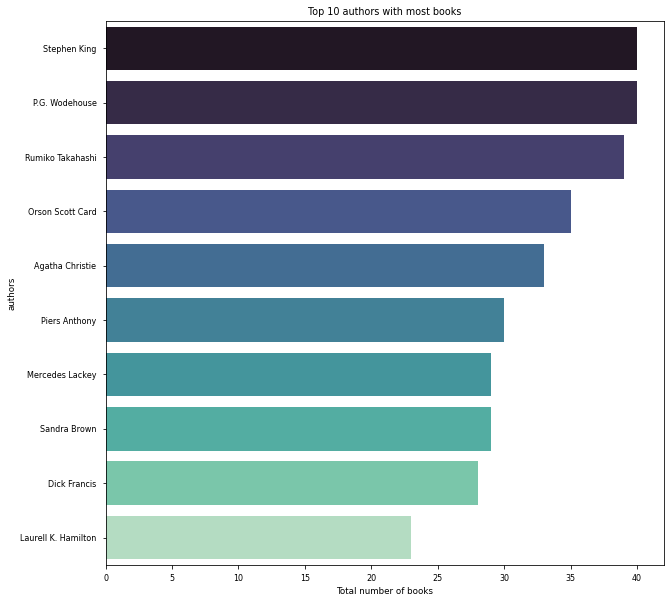

In [ ]:
# plotting a graph for the top 10 authors who have written the most number of books

plt.figure(figsize=(10,10))
ax=sns.barplot(x = book_authors['title'], y = book_authors.index, data = book_authors, palette="mako")
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
plt.show()

In [ ]:
# to know the top 10 authors that have written highest rated books

highest_rating_book_authors = df.groupby('authors')['average_rating'].mean().reset_index().sort_values('average_rating', ascending = False).head(10).set_index('authors')
highest_rating_book_authors

,average_rating
authors,
Keith Donohue,5.0
John Diamond,5.0
R. McL. Wilson,5.0
Nicholas Evans/Rhonda Evans,5.0
James E. Campbell,5.0
Aristophanes/F.W. Hall/W.M. Geldart,5.0
Chris Green/Chris Wright/Paul Douglas Gardner,5.0
Sheri Rose Shepherd,5.0
Laura Driscoll/Alisa Klayman-Grodsky/Eric Weiner,5.0


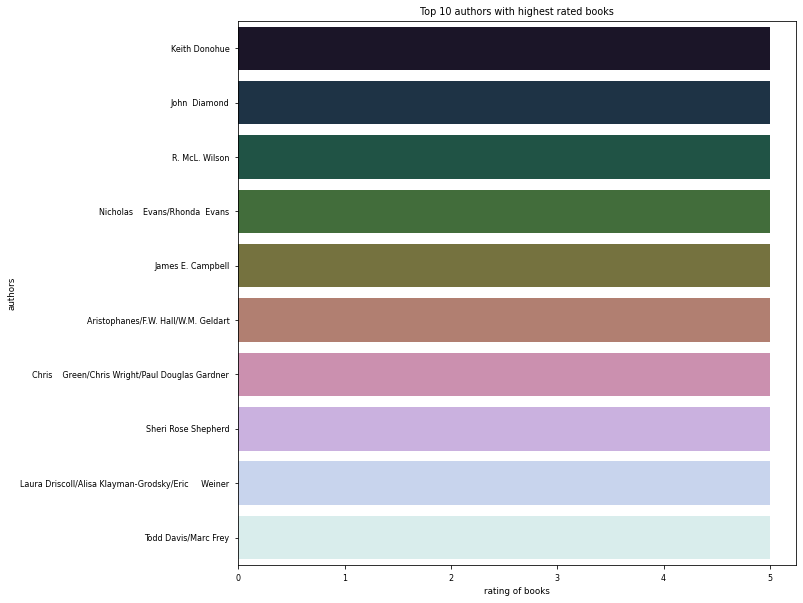

In [ ]:
# to plot a graph for the top 10 authors that have written highest rated books

plt.figure(figsize=(10,10))
ax=sns.barplot(x = highest_rating_book_authors['average_rating'], y = highest_rating_book_authors.index, data = highest_rating_book_authors, palette="cubehelix")
ax.set_title("Top 10 authors with highest rated books")
ax.set_xlabel("rating of books")
plt.show()

In [ ]:


#df.loc[df['authors'].isin(['Stephen King', 'P.G. Wodehouse', 'Rumiko Takahashi', 'Orson Scott Card', 'Agatha Christie', 'Piers Anthony', 'Mercedes Lackey', 'Sandra Brown', 'Dick Francis', 'Laurell K. Hamilton'])

most_books_authors=df.loc[df['authors'].isin(book_authors.index)]
# most_books_authors.authors.unique()
most_books_authors

best_authors = most_books_authors.groupby('authors')['average_rating'].mean().reset_index().sort_values('average_rating', ascending = False).head(10).set_index('authors')
best_authors

# these are the best authors since they have written quite a few books and the average rating given to all those books is also good







,average_rating
authors,
Rumiko Takahashi,4.186667
P.G. Wodehouse,4.147250
Mercedes Lackey,4.039310
Agatha Christie,3.989091
Laurell K. Hamilton,3.988696
Stephen King,3.973500
Dick Francis,3.962143
Orson Scott Card,3.779143
Sandra Brown,3.742069


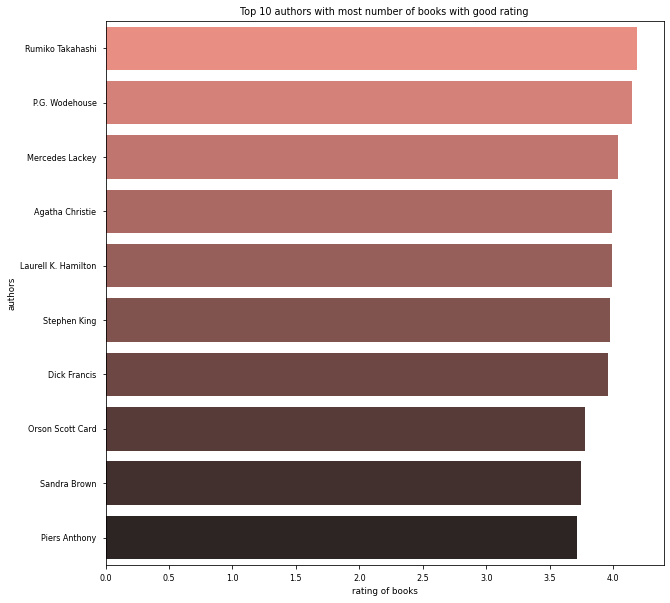

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.barplot(x = best_authors['average_rating'], y = best_authors.index, data = best_authors, palette="dark:salmon_r")
ax.set_title("Top 10 authors with most number of books with good rating")
ax.set_xlabel("rating of books")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'average rating')

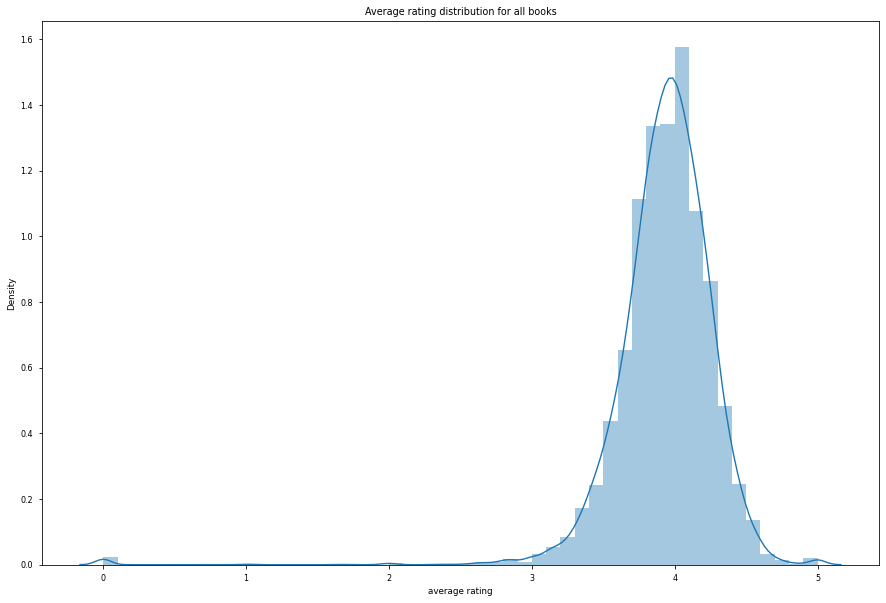

In [ ]:
fig, ax= plt.subplots(figsize=[15,10])

sns.distplot(df['average_rating'])
ax.set_title('Average rating distribution for all books')
ax.set_xlabel('average rating')

#distplot allows you to plot a histogram with a line through it.

<Figure size 1440x1440 with 0 Axes>

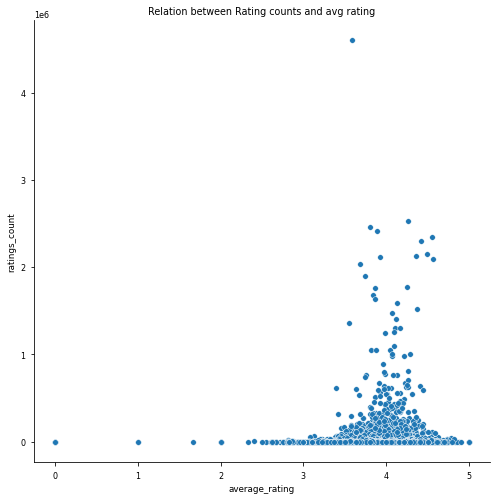

In [ ]:
plt.figure(figsize=(20,20))
ax=sns.relplot(data=df, x="average_rating", y="ratings_count",sizes=(400,200), height=7)
plt.title('Relation between Rating counts and avg rating')
ax.set_axis_labels("average_rating", "ratings_count")

#giving the relationship between the number of ratings given to book and the average rating of book

In [ ]:
# pd.unique(df['authors'])

df2 = df.copy() #creating a copy of the dataframe df

df2.loc[(df2['average_rating']>=0)&(df2['average_rating']<=1),'rating between']="between 0 and 1" #getting values which are present between 0 and 1
df2.loc[(df2['average_rating']>=1)&(df2['average_rating']<=2), 'rating between']="between 1 and 2"
df2.loc[(df2['average_rating']>=2)&(df2['average_rating']<=3), 'rating between']="between 2 and 3"
df2.loc[(df2['average_rating']>=3)&(df2['average_rating']<=4), 'rating between']="between 3 and 4"
df2.loc[(df2['average_rating']>=4)&(df2['average_rating']<=5), 'rating between']="between 4 and 5"

df2.sort_values('average_rating')

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating between
10542,6862,25841,The Road To War 1933 39,Andrew Hunt,0.0,340774770,9.78034E+12,eng,128.0,0,0,04-01-2000,Hodder & Stoughton Educational Division,between 0 and 1
1166,5325,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,916724948,9.78092E+12,eng,63.0,0,0,12/31/1997,Arts Publications,between 0 and 1
7517,7402,28467,Sclerotherapy and vein treatment,Robert A. Weiss/Margaret A. Weiss/Karen L. Bea...,0.0,71485422,9.78007E+12,eng,248.0,0,0,12/30/2011,McGraw-Hill Professional Publishing,between 0 and 1
8534,7576,29091,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel/Michael John Petry,0.0,9027712050,9.78903E+12,eng,210.0,0,0,5/31/1981,Springer,between 0 and 1
6605,6383,24010,"Laguna I Love You: The Best of ""Our Town""",John Weld/Phil Interlandi,0.0,1564741575,9.78156E+12,eng,285.0,0,0,03-01-1996,Fithian Press,between 0 and 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,9724,38804,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.0,1930901356,9.78193E+12,eng,222.0,1,0,7/25/2003,Academica Press,between 4 and 5
65,5025,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,851621813,9.78085E+12,eng,96.0,1,0,06-01-2004,Boosey & Hawkes Inc,between 4 and 5
4724,6187,23276,Taxation of Mineral Rents,Ross Garnaut,5.0,198284543,9.7802E+12,eng,350.0,1,0,11/17/1983,Oxford University Press USA,between 4 and 5
7801,9897,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0,1590529626,9.78159E+12,eng,240.0,2,0,10/16/2007,Multnomah,between 4 and 5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
rating_df=pd.get_dummies(df2['rating between'])
rating_df

#converting the values of the 'rating between' column into numerical data so that we can give it to the model
# pandas.get_dummies() function will convert categorical data into numbers

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,0,1
8,0,0,0,1,0
...,...,...,...,...,...
11122,0,0,0,0,1
11123,0,0,0,0,1
11124,0,0,0,1,0
11125,0,0,0,0,1


In [ ]:
language_df = pd.get_dummies(df2['language_code'])
language_df

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11123,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11124,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11125,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
author_df = pd.get_dummies(df2['authors'])
author_df

,A.B. Yehoshua/Hillel Halkin,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,A.J. Jacobs,A.M. Homes,A.N. Roquelaure/Anne Rice,A.S. Byatt,Abbie Hoffman/Anita Hoffman,Abdul Rahman Munif/Peter Theroux,Abigail Adams/Frank Shuffelton,...,Åsne Seierstad/Ingrid Christopherson,Émile Zola/Andrew Moore/Ernest Alfred Vizetelly,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset_model=pd.concat([rating_df, language_df, author_df, df2['average_rating'], df2['ratings_count']], axis=1)
dataset_model

#dataset_model is the dataset that will be given to the machine learning model
#it has been prepared so that the machine learning model can use it.

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt,average_rating,ratings_count
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.90,63
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.47,34
6,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3.99,6
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,9659
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.85,36303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.16,68
11123,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.21,61
11124,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.50,12
11125,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.00,7


In [ ]:
dataset_model1=pd.concat([rating_df, language_df, author_df, df2['average_rating']], axis=1)
dataset_model1

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,Émile Zola/Andrew Moore/Ernest Alfred Vizetelly,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt,average_rating
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.90
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.47
6,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.99
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.42
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.16
11123,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.21
11124,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.50
11125,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00


In [ ]:
# import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

dataset_model = minmax.fit_transform(dataset_model)

dataset_model

#sklearn is a very useful python libraray for machine learning. it provides efficient tools for machine learning and statistical modeling
#such as preprocessing, classification, regression etc.

#MinMaxScaler() is used for normalizing the data to fit into a standard range


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.80000000e-01, 1.37026048e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.94000000e-01, 7.39505654e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.98000000e-01, 1.30500998e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.00000000e-01, 2.61001995e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.00000000e-01, 1.52251164e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.60000000e-01, 2.24026713e-05]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

dataset_model1 = minmax.fit_transform(dataset_model1)

dataset_model1

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.78 ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.694],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.798],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.7  ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.8  ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.76 ]])

In [ ]:
# from sklearn import neighbors
# model=neighbors.NearestNeighbors(n_neighbors=11, algorithm='ball_tree')
# model.fit(dataset_model1)
# dist1, idlist1=model.kneighbors(dataset_model1)

In [ ]:
from sklearn import neighbors
model=neighbors. (n_neighbors=10, algorithm='ball_tree')
model.fit(dataset_model)
dist, idlist=model.kneighbors(dataset_model)

In [ ]:
dist

array([[0.        , 0.038     , 0.038     , ..., 1.41421498, 1.41421498,
        1.41421767],
       [0.        , 1.41421356, 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356],
       [0.        , 1.41421356, 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421357],
       ...,
       [0.        , 1.41421356, 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356],
       [0.        , 0.086     , 0.2       , ..., 1.41421356, 1.41421356,
        1.41421356],
       [0.        , 1.41421356, 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356]])

In [ ]:
idlist

array([[    0,  2385,  2435, ...,  6974,  2704,   255],
       [    1,  7075,  7088, ..., 10949,  3468,  5399],
       [    2,  1236,  8649, ...,   981,  1633,  1486],
       ...,
       [11120,   425,  5553, ...,  7430,   542,  1292],
       [11121,  8878,  8884, ...,    19,  3295,  9619],
       [11122,  9114,  4317, ...,   465,  1783,   700]])

In [ ]:
def bookRecom(name):
    book_list=[]
    book_id=df2[df2['title']==name].index
    book_id=book_id[0]
    for new in idlist[book_id]:
        book_list.append(df2.loc[new].title)
    return book_list

Book_name=bookRecom('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
Book_name[1:]


['The Female Brain',
 'Tell Me No Lies',
 'Odd Thomas (Odd Thomas  #1)',
 'The Deep End of the Ocean (Cappadora Family  #1)',
 'Adventures of Huckleberry Finn',
 'The Dick Francis Treasury of Great Racing Stories',
 'Plays Pleasant',
 'The Brothers Lionheart',
 'Data Structures and Algorithm Analysis in C++']

In [ ]:
 def bookRecom1(name):
     book_list=[]
     book_id=df2[df2['title']==name].index
     book_id=book_id[0]
     for new in idlist1[book_id]:
         book_list.append(df2.loc[new].title)
     return book_list

 Book_name=bookRecom1("Harry Potter and the Half-Blood Prince (Harry Potter  #6)")
 Book_name[1:]

['The Years of Rice and Salt',
 'Mr. Christmas',
 'Storm of the Century: An Original Screenplay',
 'The J.R.R. Tolkien Handbook: A Comprehensive Guide to His Life  Writings  and World of Middle-Earth',
 'Grand Conspiracy (Wars of Light & Shadow #5; Arc 3 - Alliance of Light  #2)',
 'Mutants & Masterminds: RPG',
 'Fables  Vol. 4: March of the Wooden Soldiers',
 'The Guns of August',
 'The Ground Beneath Her Feet',
 'Magic Circles: The Beatles in Dream and History']

In [ ]:
import numpy as np
np.save("idlist.npy", idlist)

In [ ]:
np.save("dist.npy", dist)

In [ ]:
idlist = np.load("idlist.npy")
idlist

array([[    0,  2385,  2435, ...,  6974,  2704,   255],
       [    1,  7075,  7088, ..., 10949,  3468,  5399],
       [    2,  1236,  8649, ...,   981,  1633,  1486],
       ...,
       [11120,   425,  5553, ...,  7430,   542,  1292],
       [11121,  8878,  8884, ...,    19,  3295,  9619],
       [11122,  9114,  4317, ...,   465,  1783,   700]])

In [ ]:
loaded_dist = np.load("dist.npy")
loaded_dist

array([[0.        , 0.038     , 0.038     , ..., 1.41421498, 1.41421498,
        1.41421767],
       [0.        , 1.41421356, 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356],
       [0.        , 1.41421356, 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421357],
       ...,
       [0.        , 1.41421356, 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356],
       [0.        , 0.086     , 0.2       , ..., 1.41421356, 1.41421356,
        1.41421356],
       [0.        , 1.41421356, 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356]])

In [ ]:
import pickle
pickle.dump(model, open('model1.pkl', 'wb'))

In [ ]:
pickle.dump(idlist, open('idlist.pkl', 'wb'))

In [ ]:
pickle.dump(df2, open('df2.pkl', 'wb'))

In [ ]:
df['title'].head(50)

4                                    L'Échiquier du mal
5            Data Structures and Abstractions with Java
6     Fundamentals of Heat and Mass Transfer [with I...
7     The Last Lion: Winston Spencer Churchill: Visi...
8                    1 000 Places to See Before You Die
9                                 Marcel Proust: A Life
10                                 Democracy in America
11    The Last Lion: Winston Spencer Churchill: Visi...
12                        Debt of Honor (Jack Ryan  #7)
13                                   Explode the Code 1
14                                  In Search of Duende
15                            A Midsummer Night's Dream
16                                        Aches & Pains
17                                           Inside Job
18                           The Beatles: The Biography
19           A Breath of Snow and Ashes (Outlander  #6)
20          The Sword of Angels (The Bronze Knight  #3)
21                      History of Political Phi